# 宿題1

ガウスカーネルモデル

$$q(y|x;\theta^{(y)}) = \sum _{j:y_j=y} \theta _j ^{(y)} \exp{\left( -\frac{\|x-x_j\|^2}{2h^2}\right)}$$

に対して, 最小二乗確率的分類

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

In [2]:
#  データ生成
n = 90
c = 3
y = np.ones((n//c, c))
for i in range(c):
    y[:, i] *= i+1
x = np.random.randn(n//c, c)+numpy.matlib.repmat(np.linspace(-3, 3, c), n//c, 1)

In [3]:
# 正則化項も入れてパラメータ計算
h = 2
lam = 1e-4
def kernel(x, xj):
    return np.exp(-(x-xj)**2/2/h/h)
theta = np.empty((n//c, c))
for cl in range(c):
    Phi = np.empty((n, n//c))
    pi = np.zeros(n)
    for i in range(n//c):
        pi[cl*(n//c)+i] = 1
    for i in range(n):
        for j in range(n//c):
            Phi[i, j] = kernel(x[i%(n//c), i//(n//c)], x[j, cl])
    theta[:, cl] = np.linalg.inv(Phi.T@Phi + lam*np.eye(n//c))@Phi.T@pi

In [4]:
X = np.linspace(-5, 5)
Y = np.zeros((len(X), c))
for cl in range(c):
    for i in range(len(X)):
        for j in range(n//c):
            Y[i, cl] += theta[j, cl]*kernel(X[i], x[j, cl])

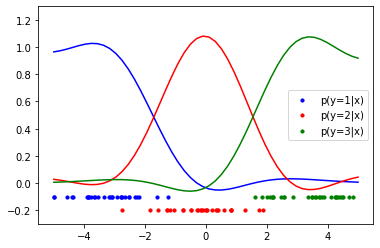

In [5]:
#  プロット
s = 10
plt.plot(X, Y[:, 0], c='blue')
plt.plot(X, Y[:, 1], c='red')
plt.plot(X, Y[:, 2], c='green')
plt.scatter(x[:, 0], np.zeros(n//c)-0.1,c='blue', s=s, label="p(y=1|x)")
plt.scatter(x[:, 1], np.zeros(n//c)-0.2, c='red', s=s, label="p(y=2|x)")
plt.scatter(x[:, 2], np.zeros(n//c)-0.1,c='green', s=s, label="p(y=3|x)")
plt.legend()
plt.ylim(-0.3, 1.3)
plt.show()

正しく分類できる関数が得られた